[View in Colaboratory](https://colab.research.google.com/github/sunnybarnwal/ML_ON1Acadview/blob/master/Assignment_19.ipynb)

In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

In [0]:
digit=load_digits()

In [48]:
digit.data.shape

(1797, 64)

In [49]:
digit.data.size

115008

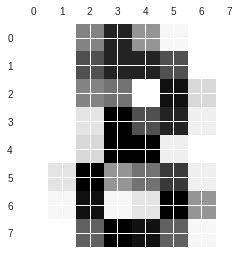

In [50]:
plt.matshow(digit.images[8]) 

In [0]:
x=digit.data

In [0]:
y=digit.target

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmean=KMeans(n_clusters=10)
cluster=kmean.fit_predict(x)

In [0]:
label=np.zeros_like(cluster)

In [0]:
from scipy.stats import mode

In [0]:
for i in range(10):
  mask=(cluster==i)
  label[mask]=mode(y[mask])[0]

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [59]:
accuracy_score(y,label)

0.7851975514746801

In [60]:
confusion_matrix(y,label)

array([[176,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0, 154,  24,   1,   0,   1,   2,   0,   0,   0],
       [  1,  10, 147,  15,   0,   0,   0,   4,   0,   0],
       [  0,   7,   1, 158,   0,   2,   0,   6,   0,   9],
       [  0,   5,   0,   0, 165,   0,   0,  11,   0,   0],
       [  0,   0,   0,   2,   2, 129,   1,   0,   0,  48],
       [  1,   3,   0,   0,   0,   0, 177,   0,   0,   0],
       [  0,  11,   0,   0,   0,   0,   0, 168,   0,   0],
       [  0, 109,   3,   2,   0,   4,   2,   4,   0,  50],
       [  0,  21,   0,   9,   0,   5,   0,   8,   0, 137]])

#Image

In [0]:
from sklearn.datasets import load_sample_image

In [0]:
img=load_sample_image('china.jpg')

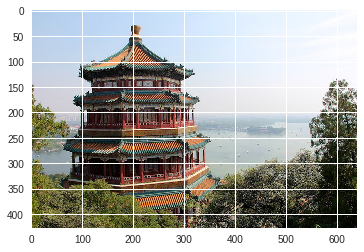

In [63]:
plt.imshow(img)

In [64]:
img.shape

(427, 640, 3)

In [65]:
img.size

819840

In [66]:
img

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [0]:
img = np.array(img, dtype=np.float64) / 255

In [0]:
w, h, d = original_shape = tuple(img.shape)

In [0]:
img_ary=img.reshape(w*h,d)

In [70]:
img_ary

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [0]:
from sklearn.utils import shuffle
image_array_sample = shuffle(img_ary, random_state=0)[:5000]

In [0]:
kimg = KMeans(n_clusters=20, random_state=0).fit(image_array_sample)

In [0]:
label=kimg.predict(img_ary)

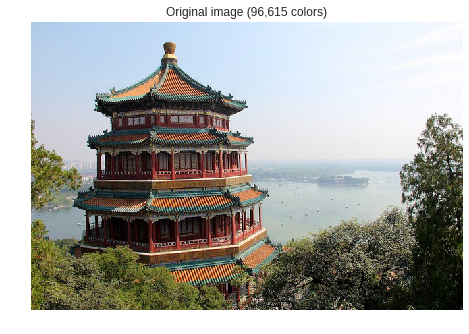

In [85]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(img)

In [0]:
new_colors=kimg.cluster_centers_[label]

In [0]:
color=new_colors.reshape(img.shape)

#Quantized image with 20 clusters

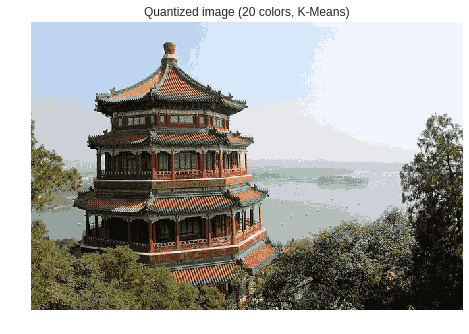

In [89]:
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (20 colors, K-Means)')
plt.imshow(color)